In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('batting_bowling_ipl_bat.csv')
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [3]:
df = df.dropna(axis = 0)
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


In [4]:
df.shape

(90, 7)

In [5]:
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [6]:
df.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

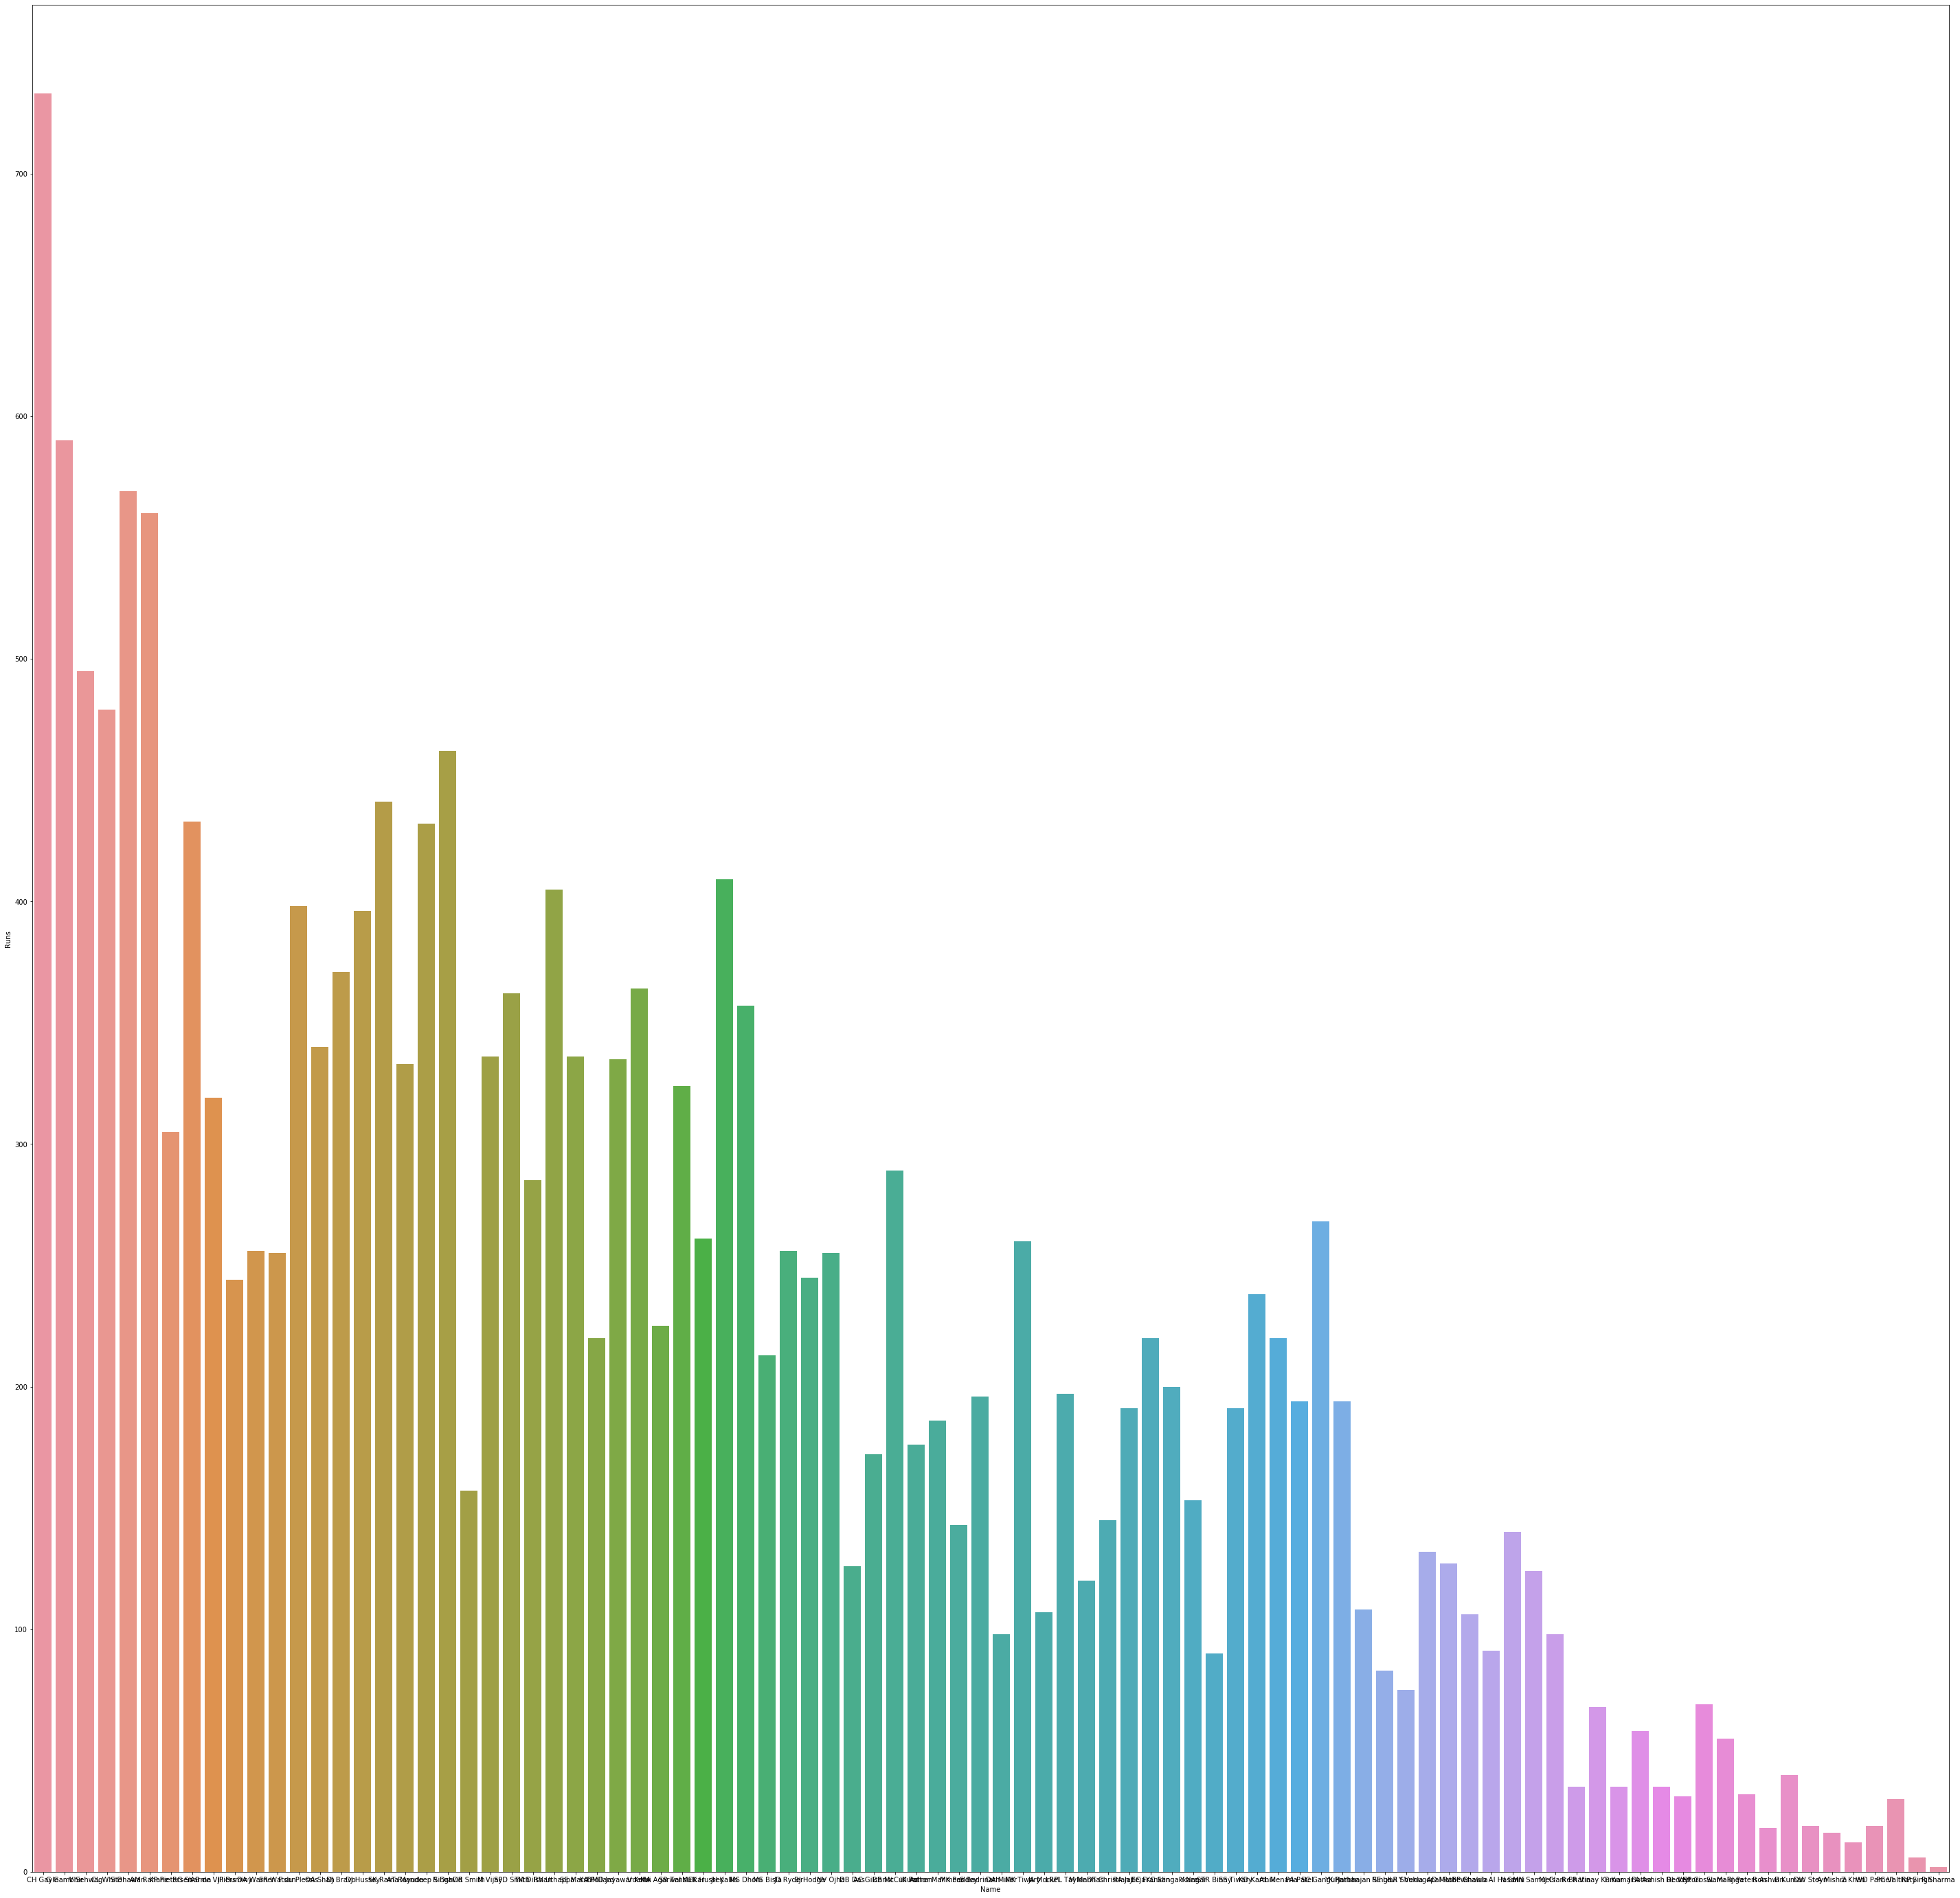

In [7]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'Runs')

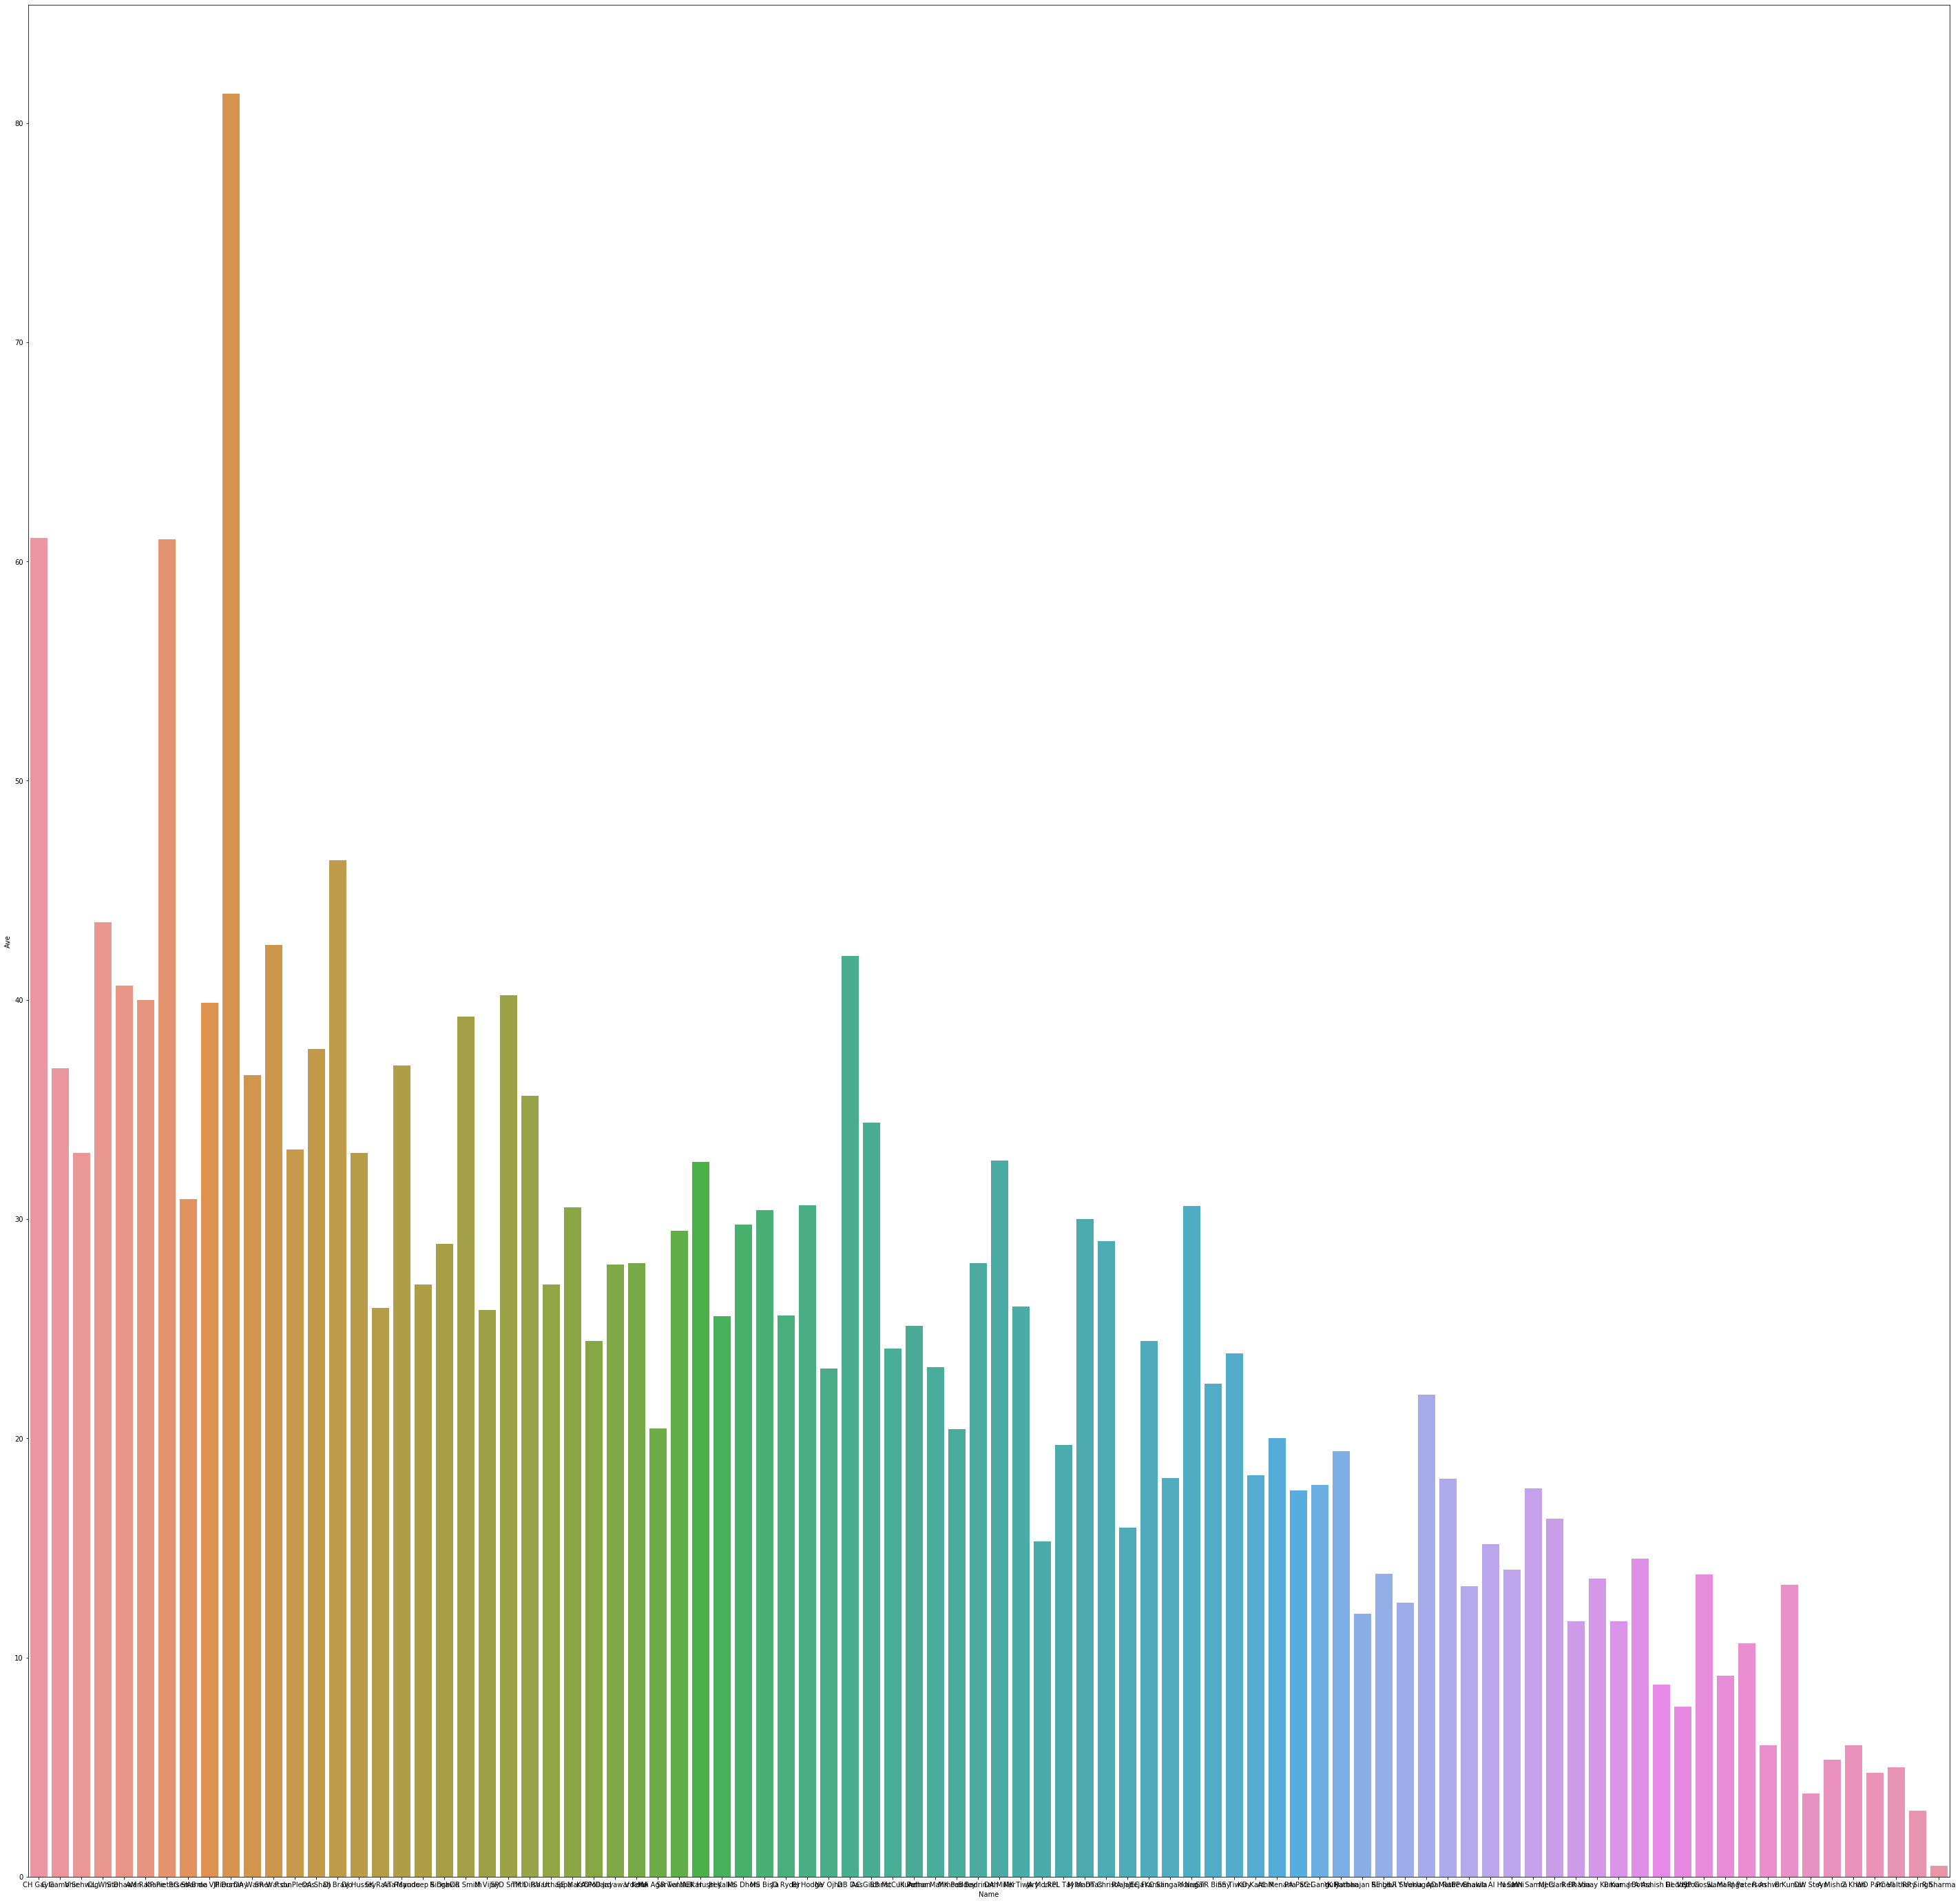

In [8]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'Ave')

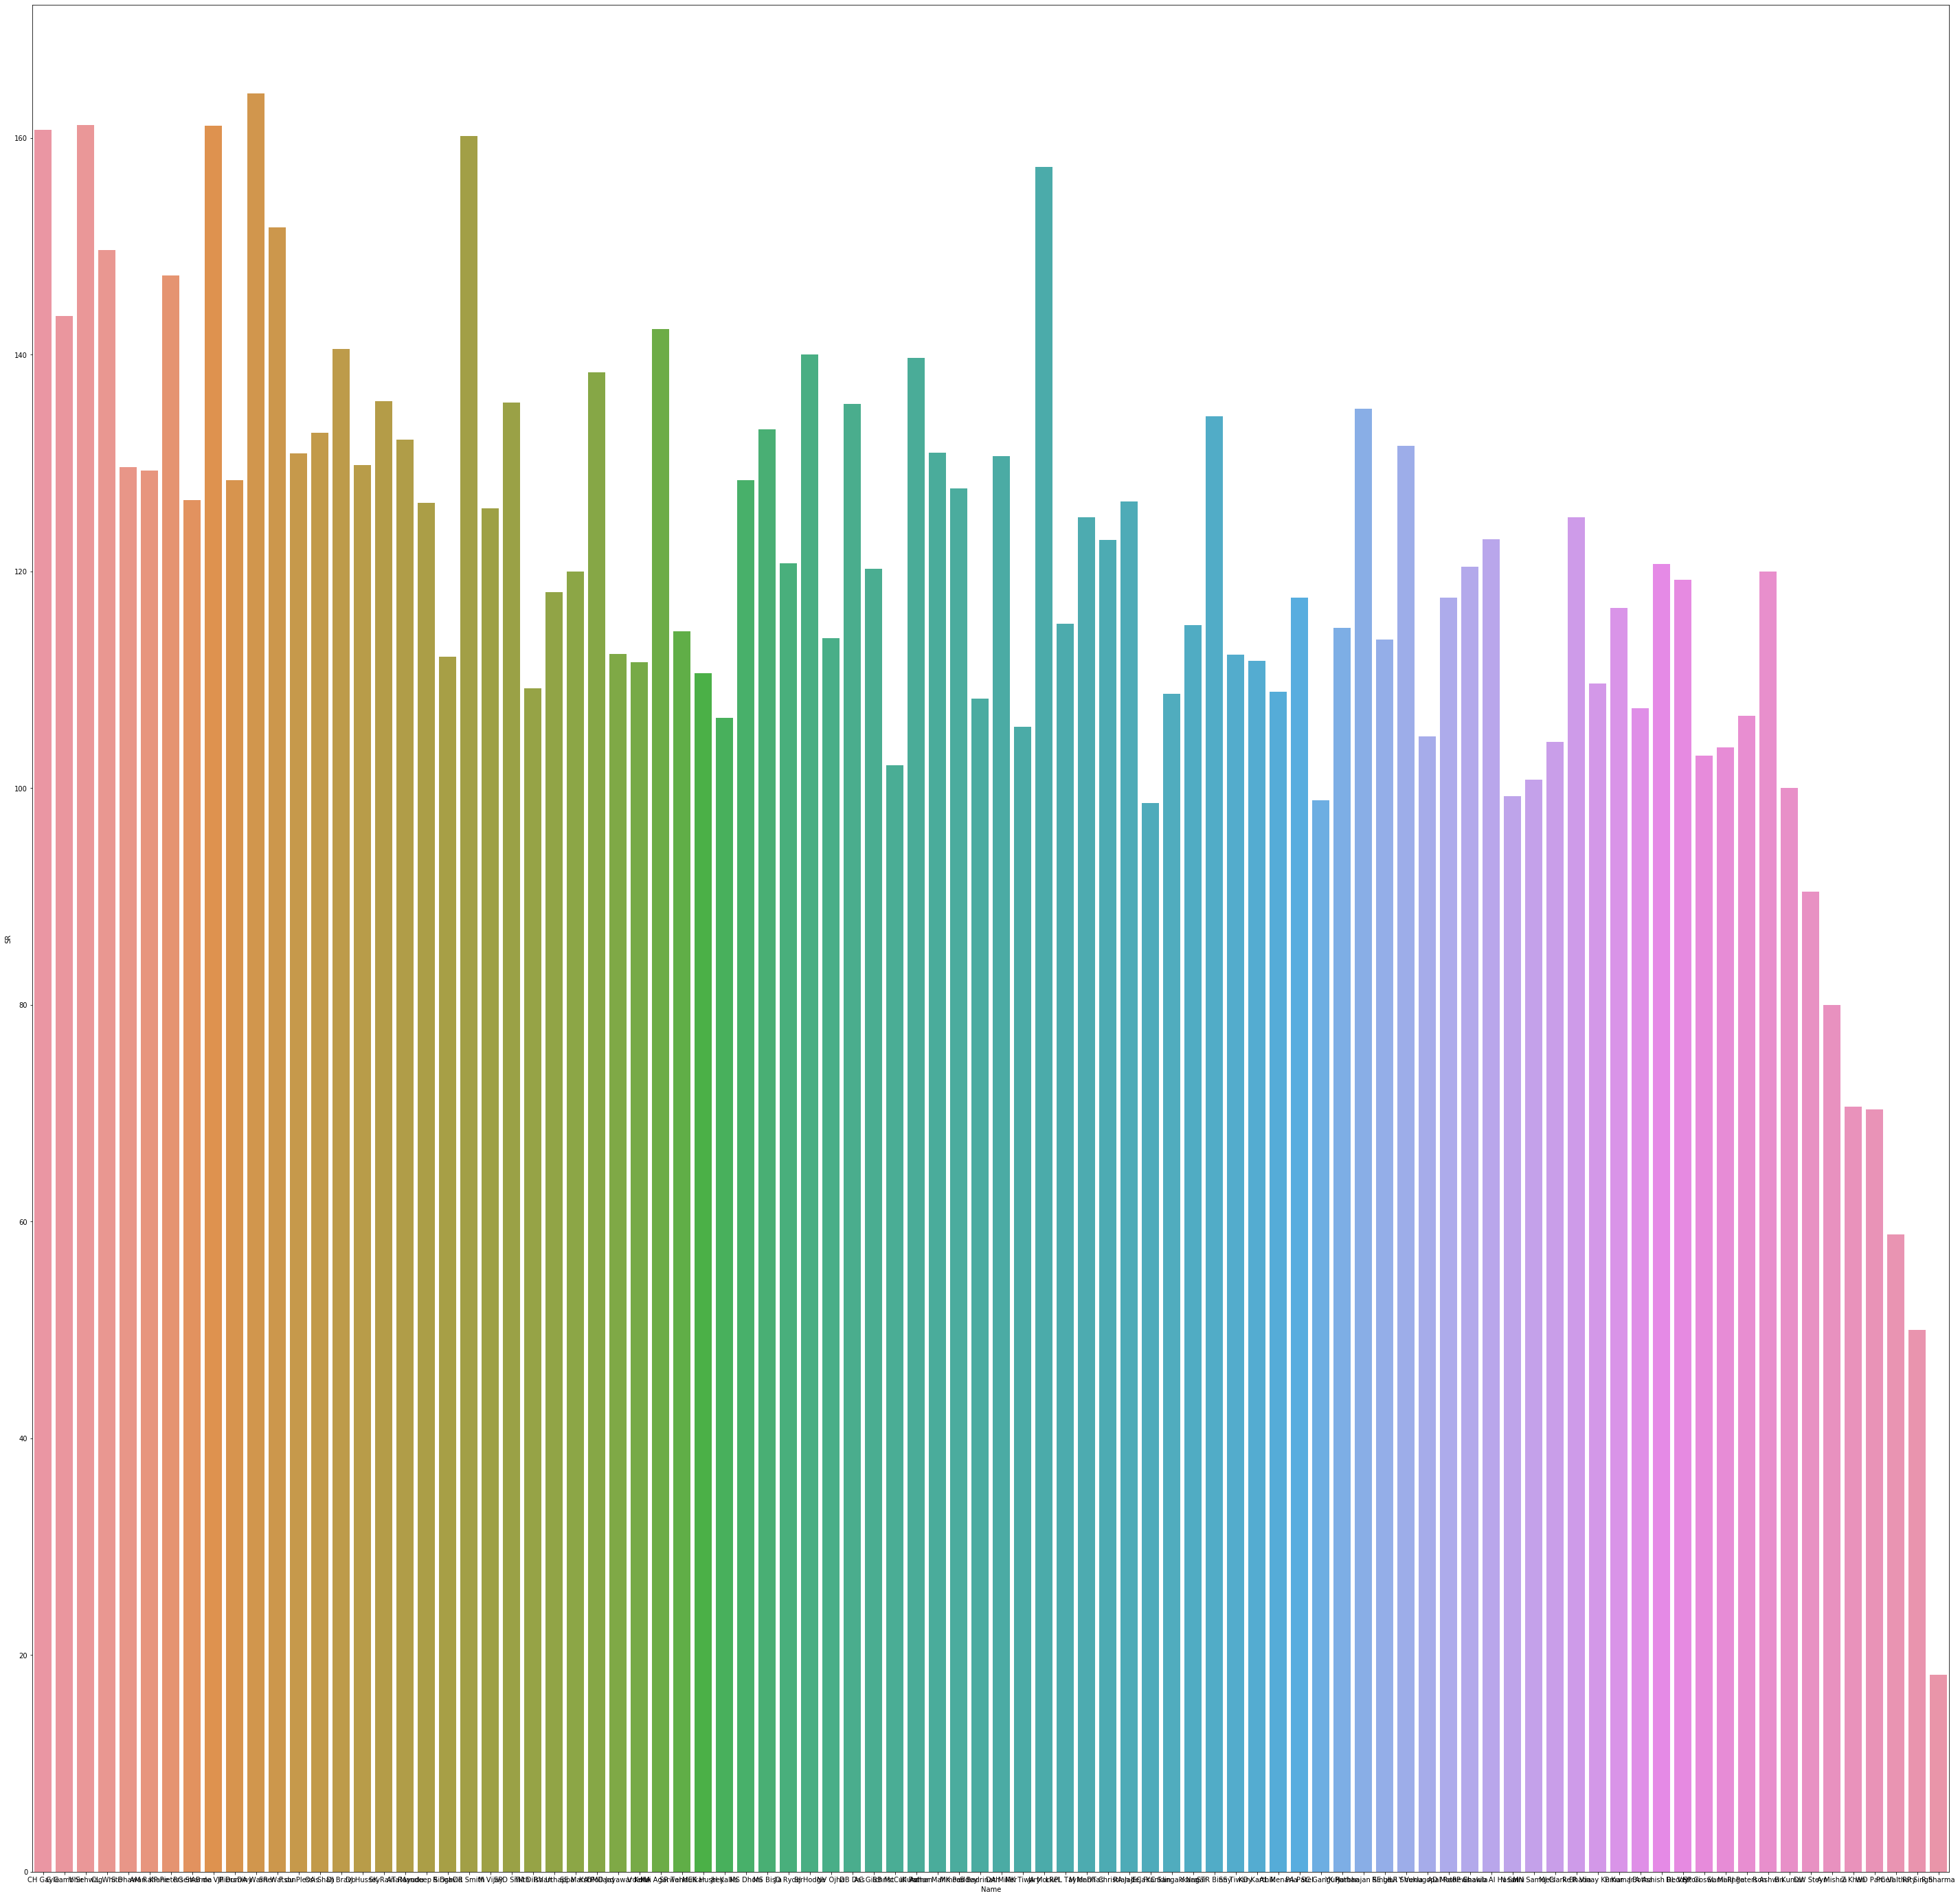

In [9]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'SR')

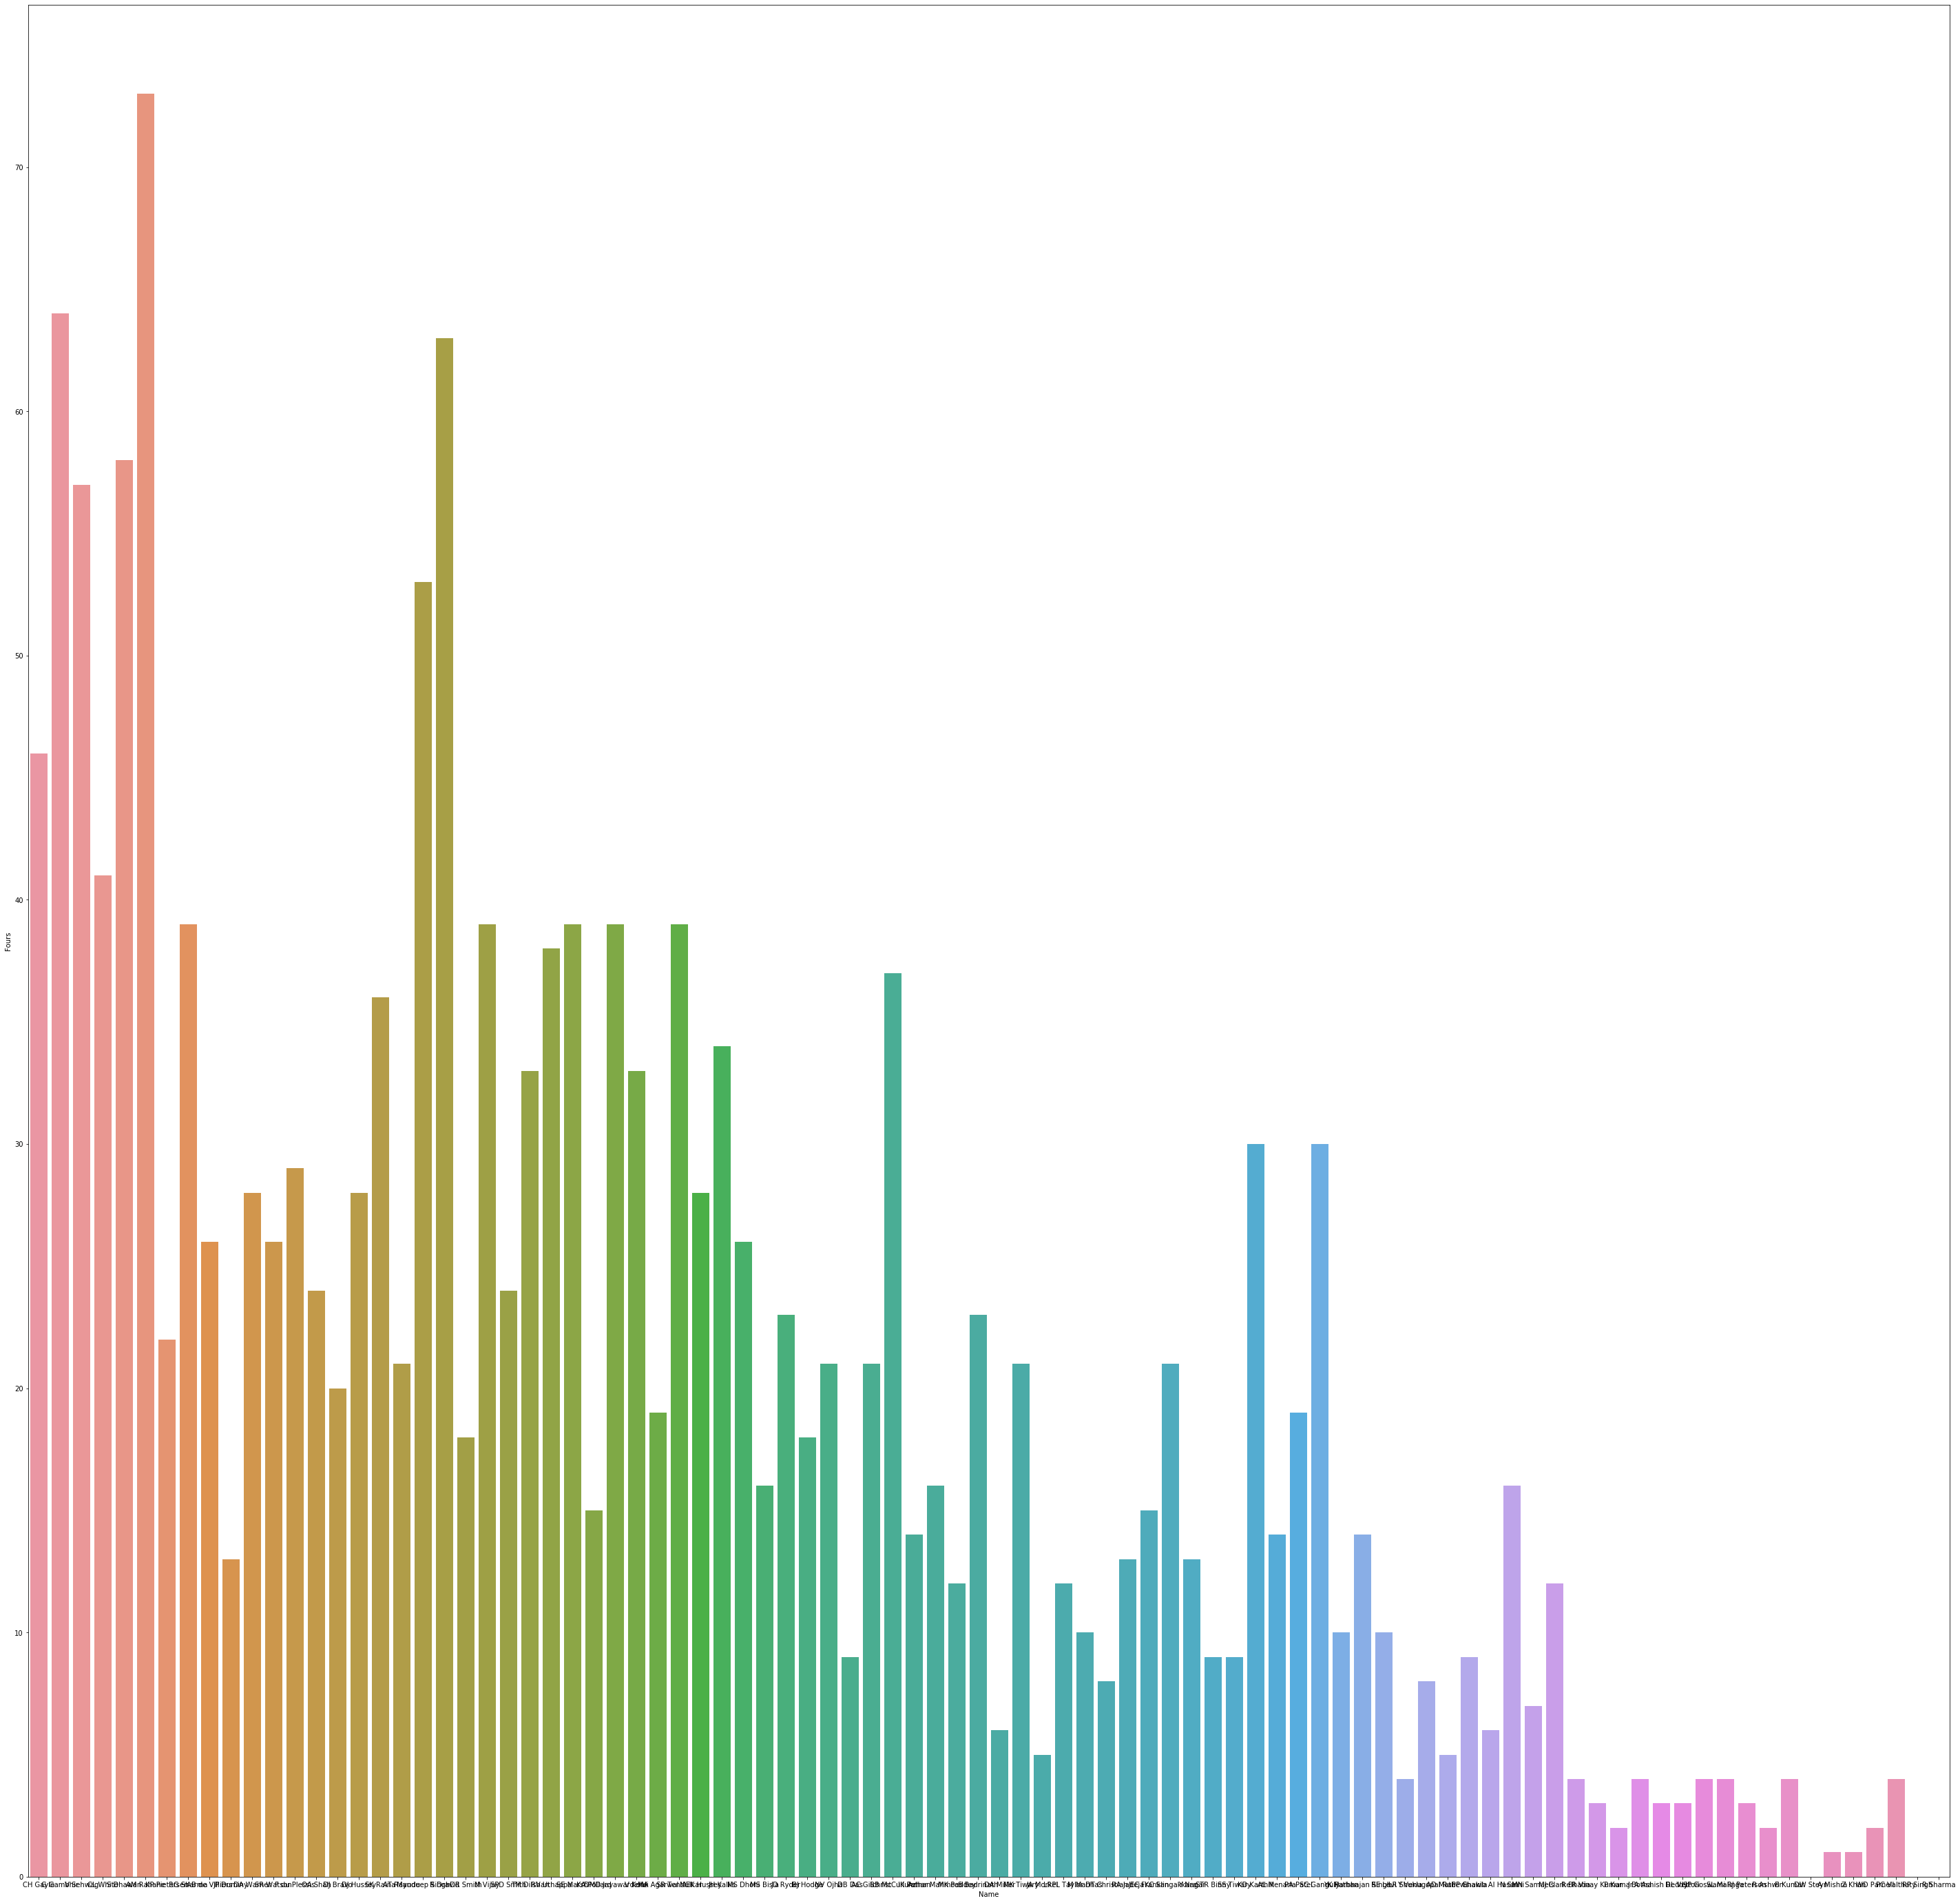

In [10]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'Fours')

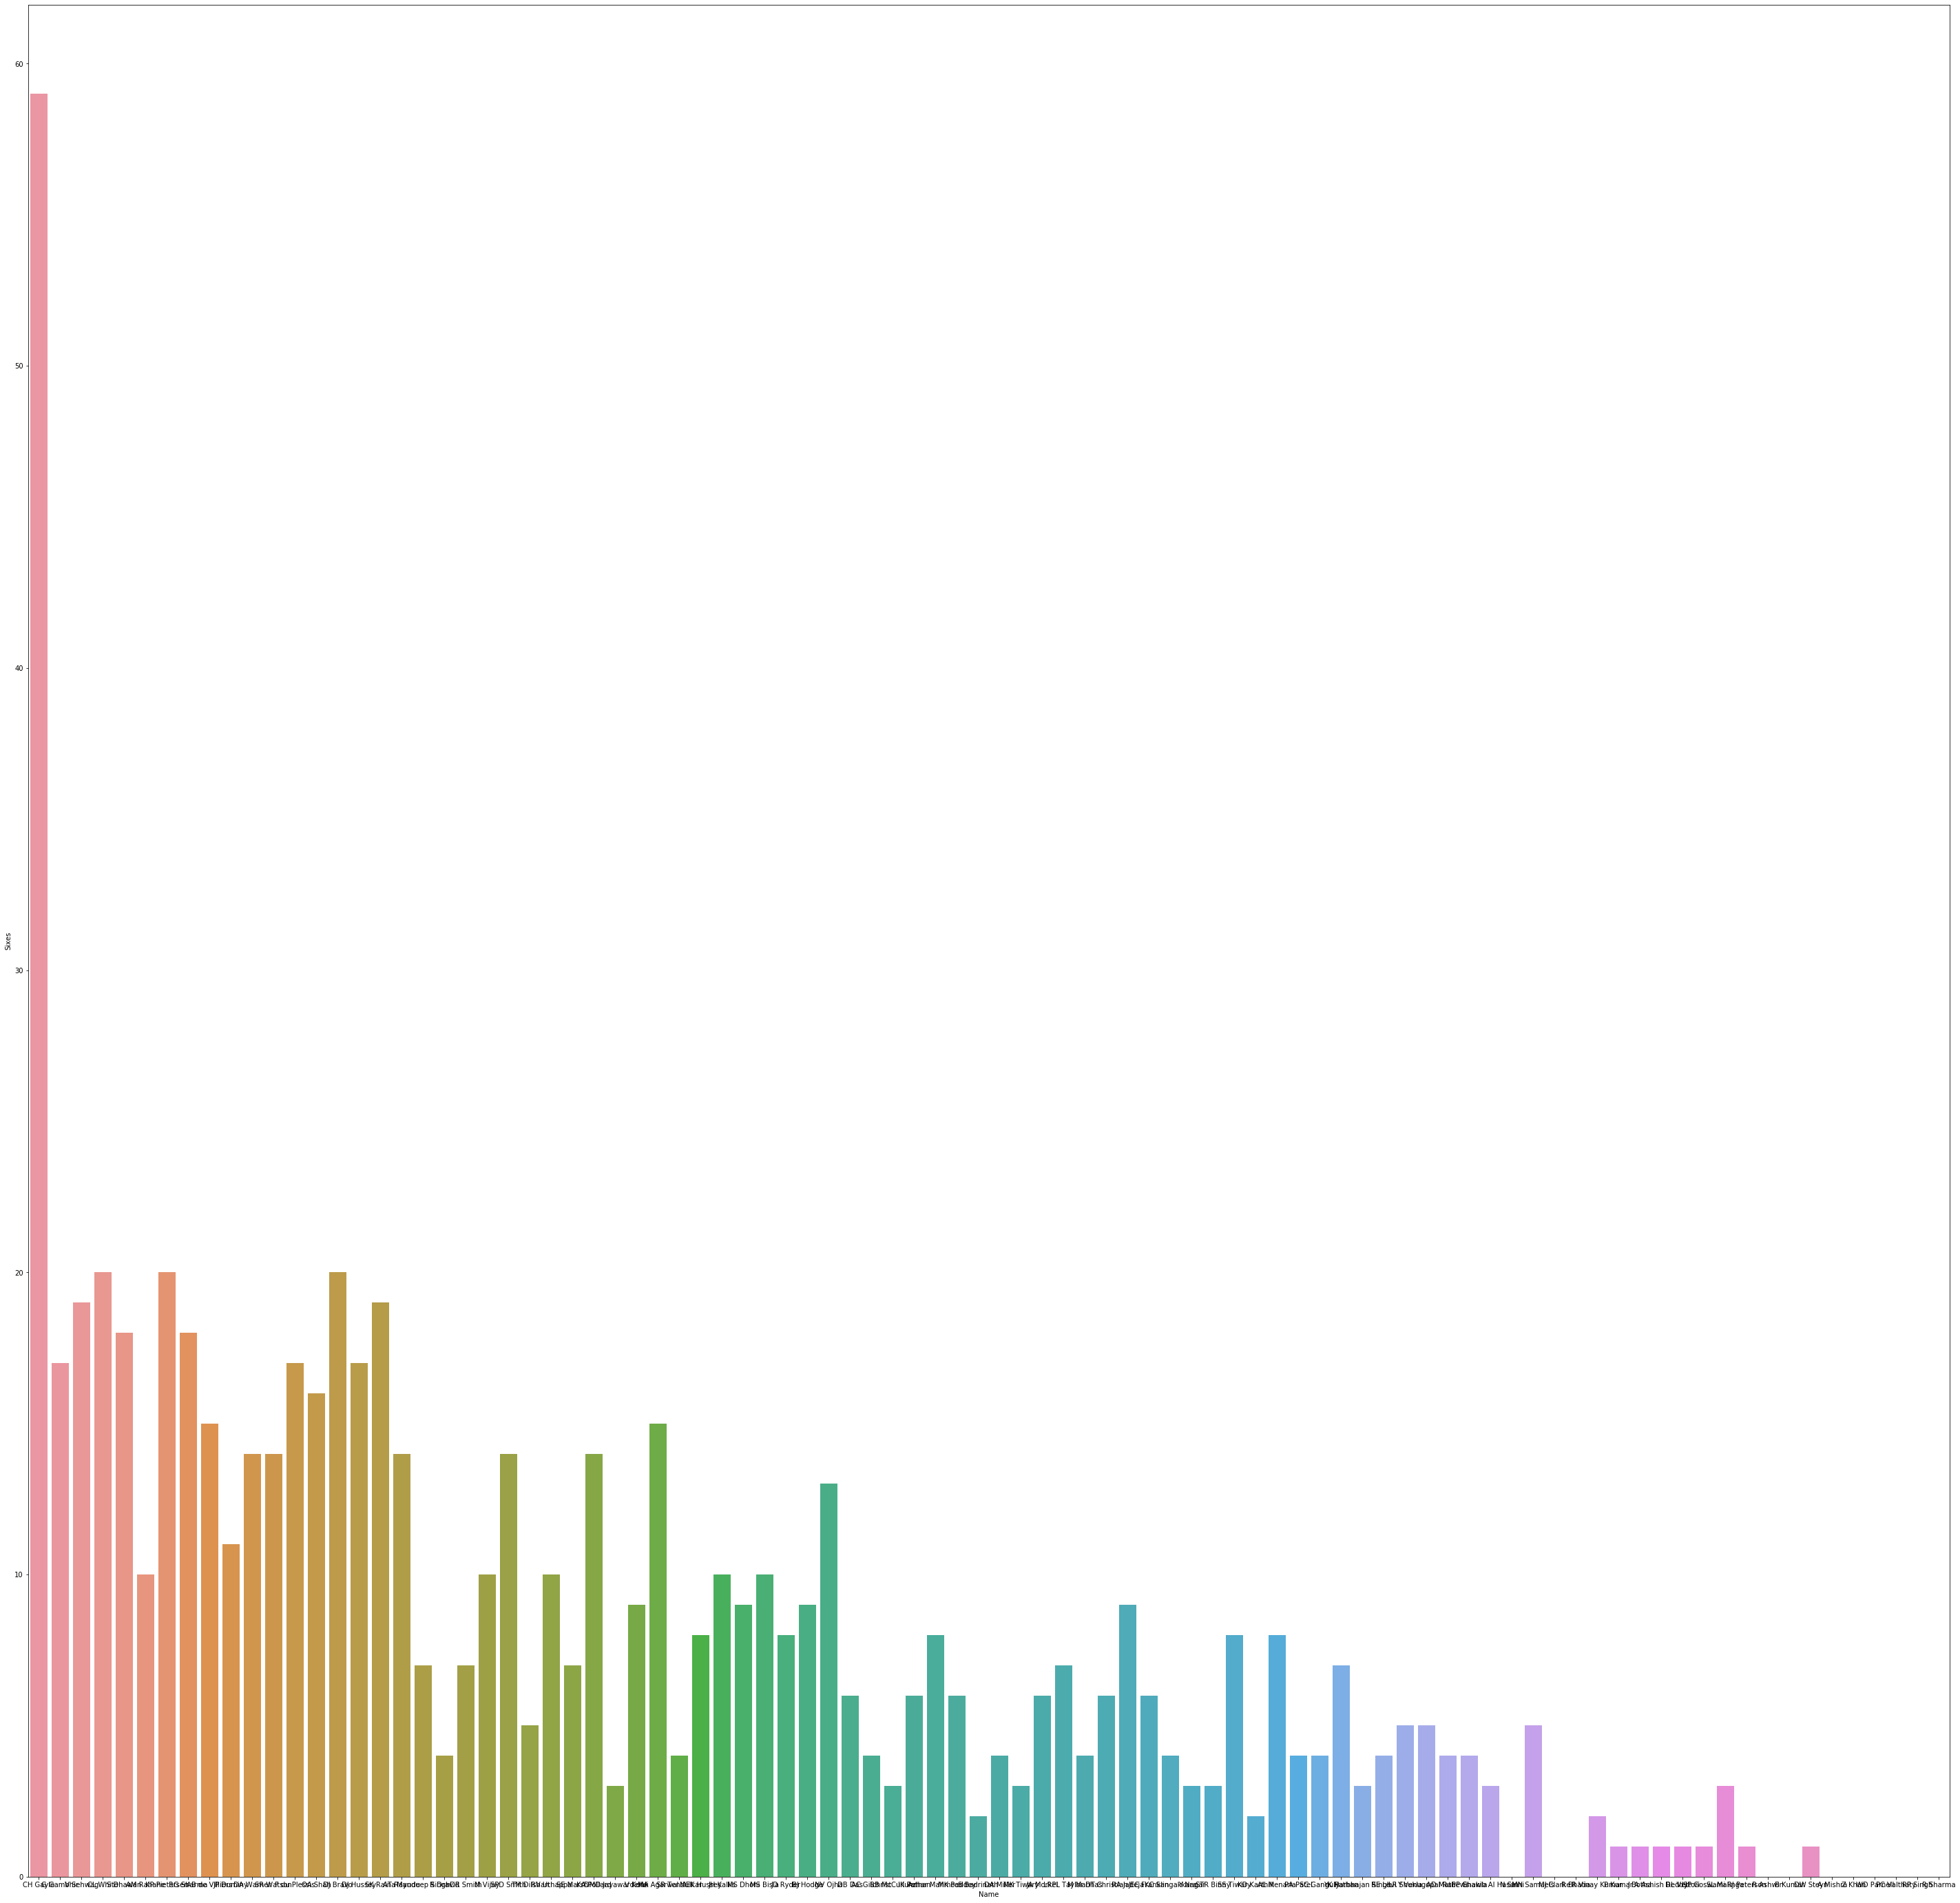

In [11]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'Sixes')

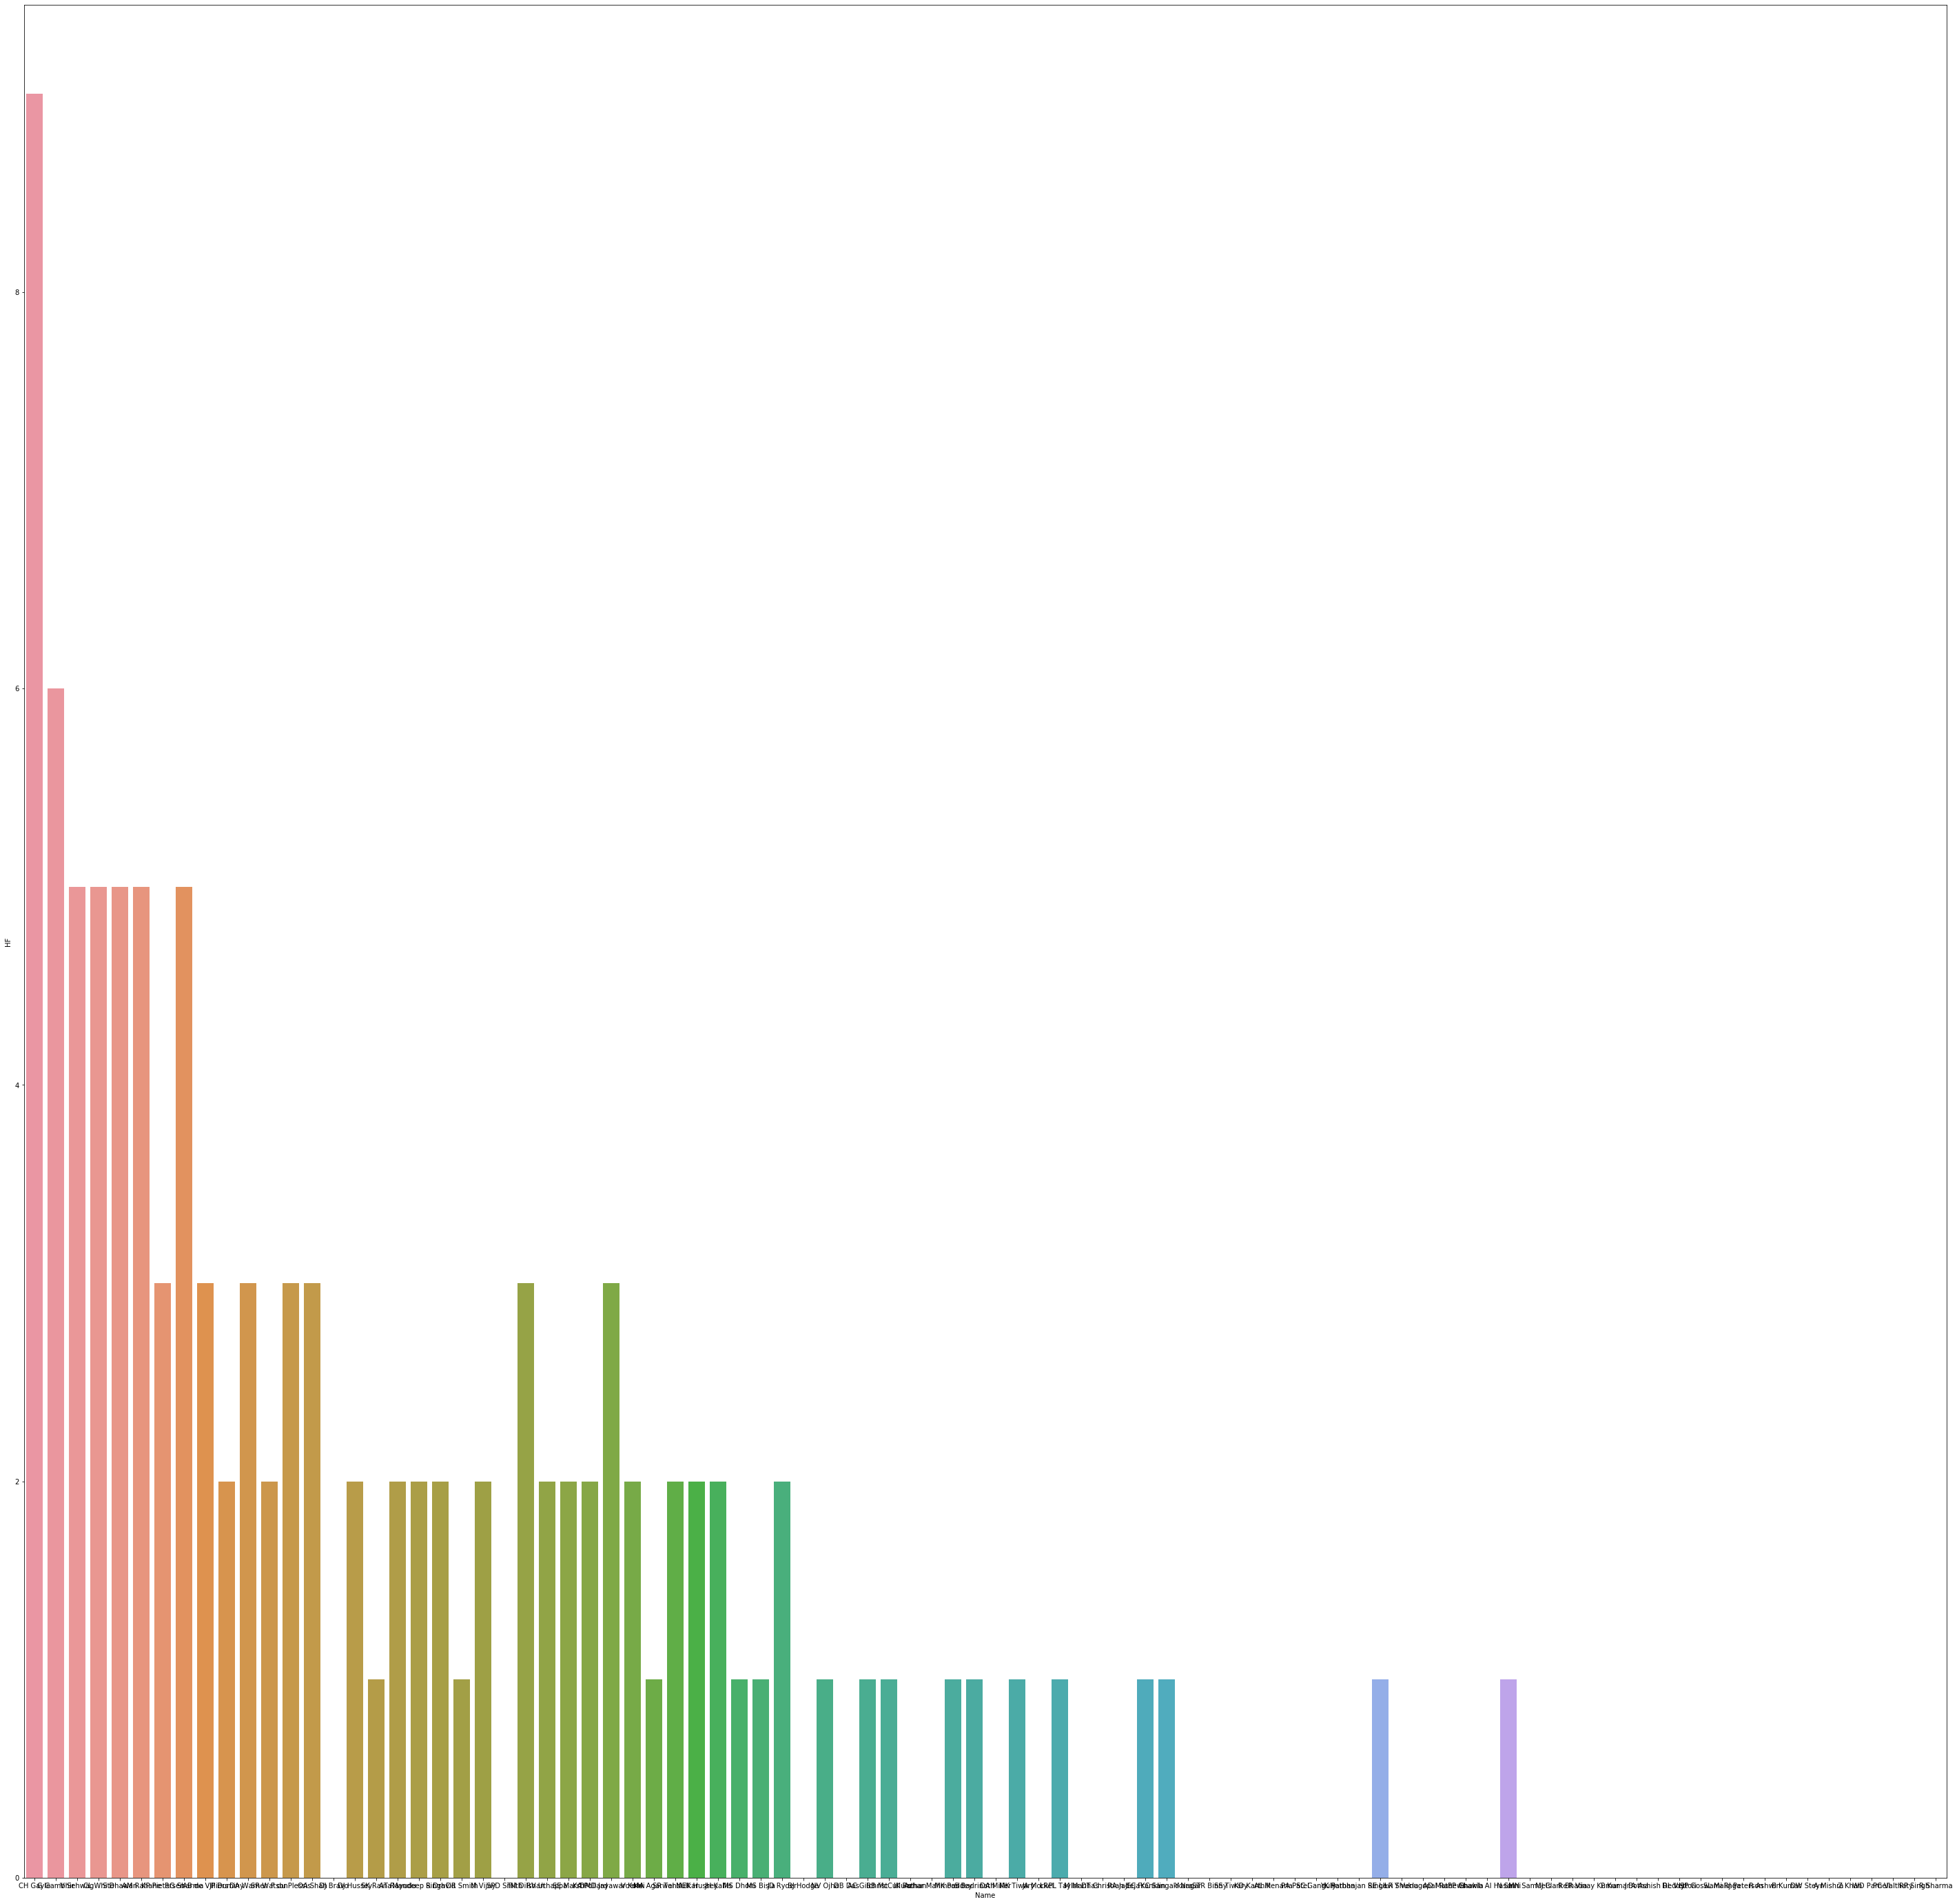

In [12]:
plt.figure(figsize=(50,50))
sns.barplot(data = df, x = 'Name', y = 'HF')

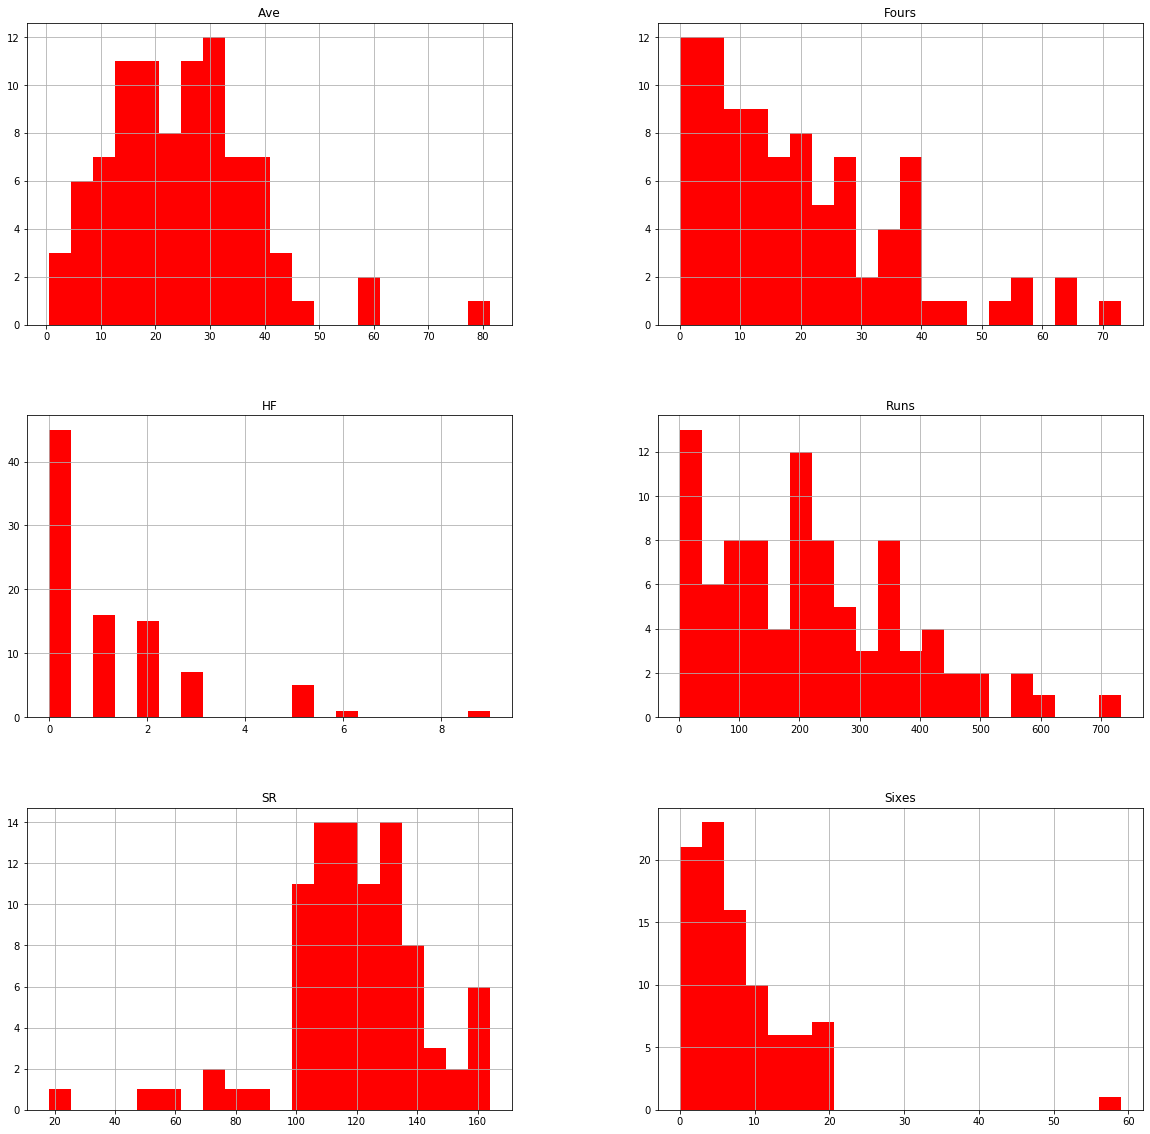

In [13]:
# Histogram
df.hist(bins = 20,figsize=(20,20), color = 'red')
plt.show()

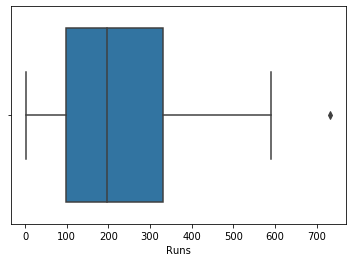

In [14]:
sns.boxplot(df['Runs'])

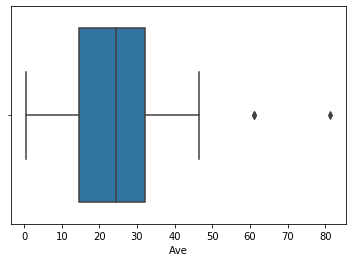

In [15]:
sns.boxplot(df['Ave'])

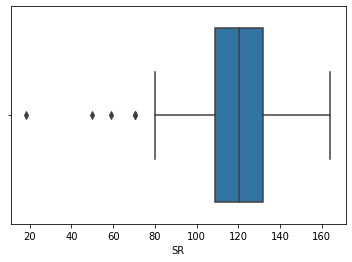

In [16]:
sns.boxplot(df['SR'])

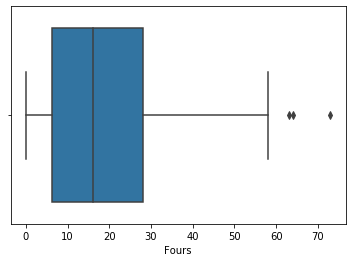

In [17]:
sns.boxplot(df['Fours'])

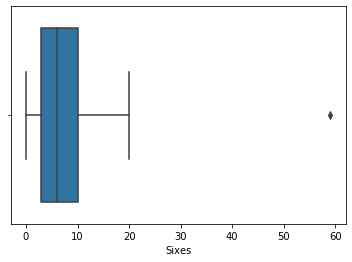

In [18]:
sns.boxplot(df['Sixes'])

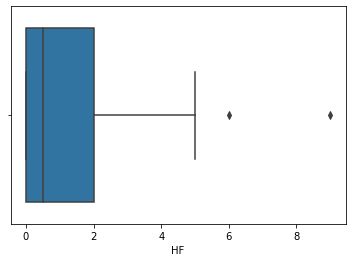

In [19]:
sns.boxplot(df['HF'])

Every attribute has outliers

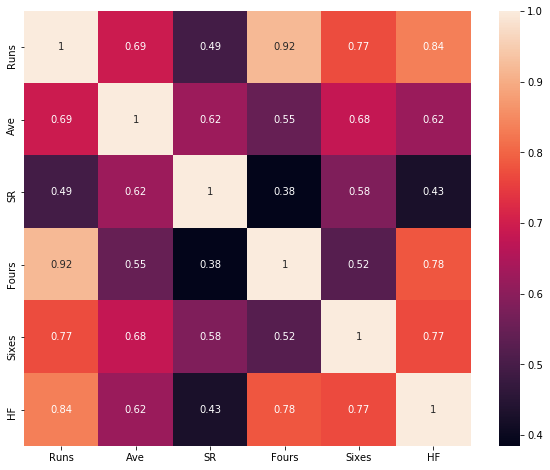

In [20]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns = 'Name').corr(),annot=True)

strike rate with half centuries and runs have high values of correlation.

In [21]:
# Normalization
from scipy.stats import zscore
new_df = df.iloc[:,1:7]
df1 = new_df.apply(zscore)
df1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


Text(0, 0.5, 'WCSS')

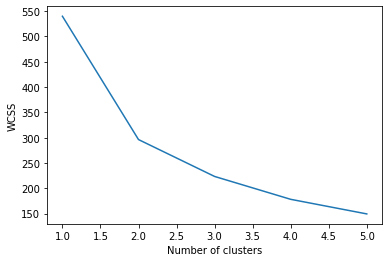

In [22]:
# To find optimal number of clusters, we are going with Elbow Method.
from sklearn.cluster import KMeans

wcss=[]
for p in range(1,6):
    kmeans = KMeans(n_clusters = p, init='k-means++', random_state=0)
    kmeans.fit(df1)
    
    wcss.append(kmeans.inertia_)
    

sns.lineplot(range(1,6), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Number of clusters = 2

In [23]:
k_means = KMeans(n_clusters =2)
k_means.fit(df1)
labels = k_means.labels_


In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df1,labels)

0.41111085574076756

In [25]:
# adding labels to our data frame
df['Rankings']=labels
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rankings
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [26]:
# Renaming 0 with low_tier and 1 with high_tier
df['Rankings'] = df['Rankings'].replace({0:'Low_tier',1:'High_tier'}) 
df

,Name,Runs,Ave,SR,Fours,Sixes,HF,Rankings
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,High_tier
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,High_tier
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,High_tier
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,High_tier
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,High_tier
...,...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,Low_tier
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,Low_tier
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,Low_tier
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,Low_tier
